In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os

import sys
sys.path.append(os.path.abspath('../'))

from simulation import model

In [2]:
ACMBlue = '#00cfe6'
ACMYellow = '#ffd600'
ACMOrange = '#fc9200'
ACMRed = '#ff1924'
ACMLightBlue = '#82fcff'
ACMGreen = '#a5cf00'
ACMPurple = '#6200d9'
ACMDarkBlue = '#0055c9'

use_tex = False

if use_tex:
    plt.rcParams.update({
        "font.family": "serif",  # use serif/main font for text elements
        "text.usetex": True,     # use inline math for ticks
        "pgf.rcfonts": False     # don't setup fonts from rc parameters
        })

In [3]:
num_reviewers = pd.Series([v for k, v in dict(model.bipartite_graph.degree()).items() if k in model.channels])
'{:.2%}'.format(num_reviewers[num_reviewers>2].size / num_reviewers.size)

'33.99%'

# Time-ignoring horizon

In [4]:
with open('../simulation/data/time_ignoring_horizon_cardinalities.json', 'r') as f:
    time_ignoring_horizon_cardinalities = pd.read_json(f, orient='index').iloc[:,0].rename('time_ignoring_horizon_cardinalities')

In [5]:
time_ignoring_horizon_cardinalities.describe()

count    37103.000000
mean     29660.009218
std      10203.647618
min          0.000000
25%      33172.000000
50%      33172.000000
75%      33172.000000
max      33172.000000
Name: time_ignoring_horizon_cardinalities, dtype: float64

Largest components

In [6]:
for s in sorted([len(cc & model.participants) for cc in nx.connected_components(model.bipartite_graph)], reverse=True)[0:5]:
    print(s, '{:.2%}'.format(s/len(model.participants)))

33173 89.41%
108 0.29%
93 0.25%
66 0.18%
61 0.16%


# Time-respecting horizon

In [7]:
with open('../simulation/data/time_respecting_horizon_cardinalities.json', 'r') as f:
    time_respecting_horizon_cardinalities = pd.read_json(f, orient='index').iloc[:,0].rename('time_respecting_horizon_cardinalities')

In [8]:
time_respecting_horizon_cardinalities.describe()

count    37103.000000
mean     10907.352317
std       9286.130779
min          0.000000
25%        201.000000
50%      11652.000000
75%      19921.000000
max      26216.000000
Name: time_respecting_horizon_cardinalities, dtype: float64

In [9]:
'{:.2%}'.format(26216/len(model.participants))

'70.66%'

# Difference between both models

In [10]:
diff = time_ignoring_horizon_cardinalities - time_respecting_horizon_cardinalities

In [11]:
diff.describe()

count    37103.000000
mean     18752.656901
std      10667.821208
min          0.000000
25%      10912.000000
50%      16822.000000
75%      30537.000000
max      33171.000000
dtype: float64

# Plots

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


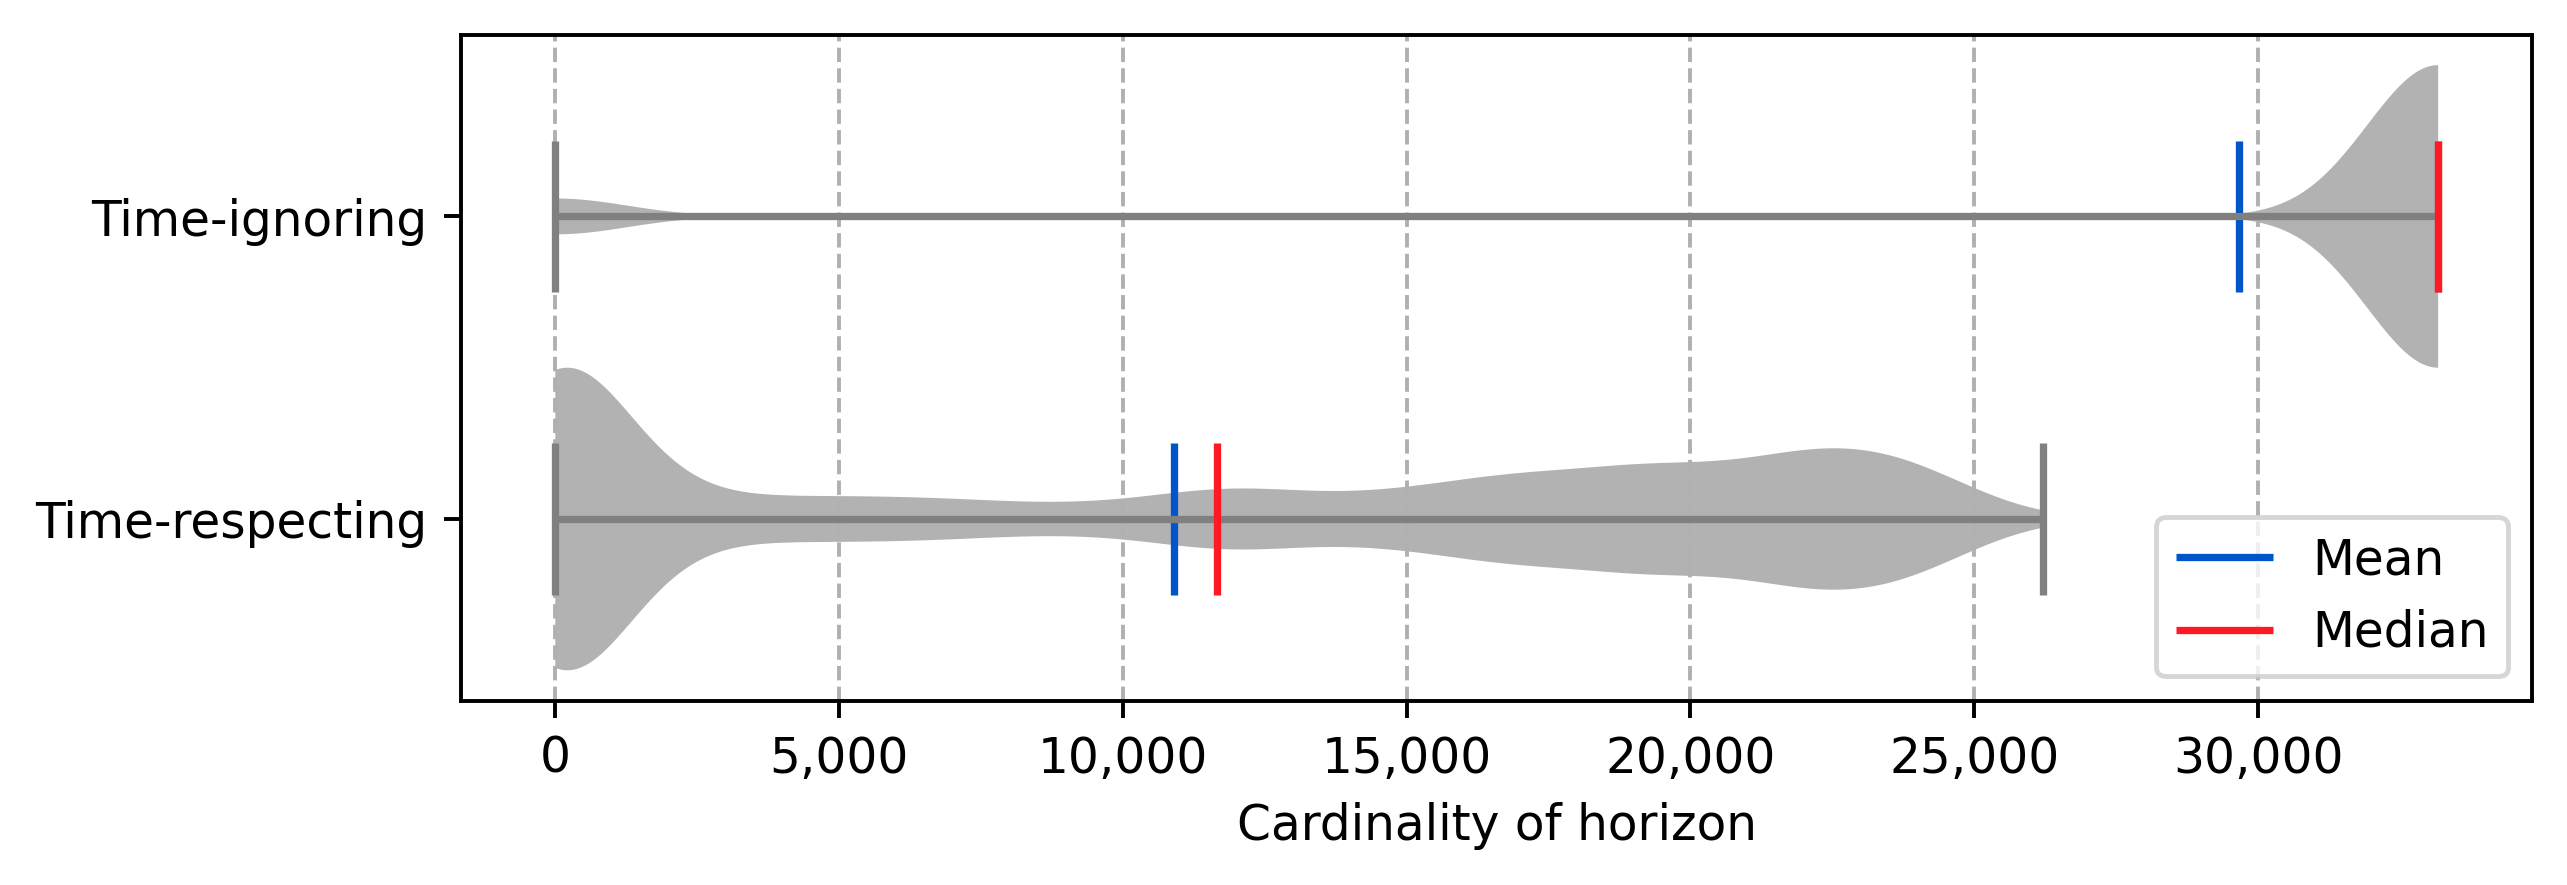

In [12]:
fig, ax = plt.subplots(figsize=(7.22, 7.22/3), dpi=350, constrained_layout=True)

violinplot = ax.violinplot([time_respecting_horizon_cardinalities, time_ignoring_horizon_cardinalities], vert=False, showmeans=True, showmedians=True, points=1000, widths=1, showextrema=True);

for i in violinplot['bodies']:
    i.set_facecolor('black')

violinplot['cmeans'].set_color(ACMDarkBlue)
violinplot['cmeans'].set_label('Mean')

violinplot['cmedians'].set_color(ACMRed)
violinplot['cmedians'].set_label('Median')

for k in ['cmaxes', 'cmins', 'cbars']:
    violinplot[k].set_color('gray')

yticklabels = ['Time-respecting', 'Time-ignoring']
ax.set_yticks([1, 2])
ax.set_yticklabels(yticklabels)
ax.set_xlabel('Cardinality of horizon')
ax.xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

ax.grid(which='both', axis='x', linestyle='--')
plt.legend(loc='lower right');

if use_tex:
    plt.savefig('../plots/dist.pgf', dpi=1000, bbox_inches='tight')
else:
    plt.savefig('../plots/dist.eps', dpi=1000, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


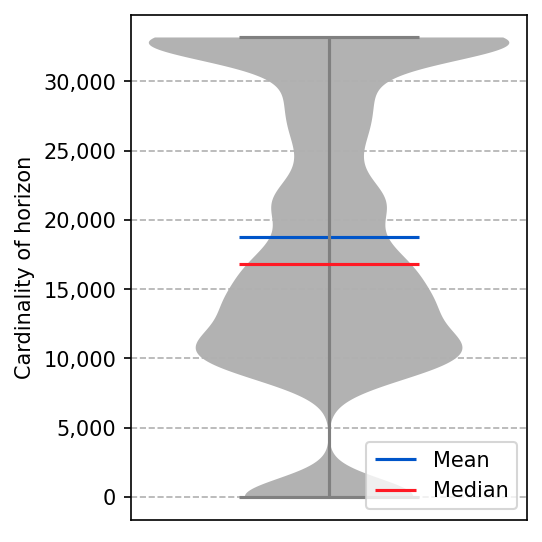

In [13]:
fig, ax = plt.subplots(figsize=(3.5, 3.5), dpi=150, constrained_layout=True);

violinplot = ax.violinplot(diff, vert=True, showmeans=True, showmedians=True, points=1000, widths=0.8, showextrema=True);

for i in violinplot['bodies']:
    i.set_facecolor('black')

violinplot['cmeans'].set_color(ACMDarkBlue)
violinplot['cmeans'].set_label('Mean')

violinplot['cmedians'].set_color(ACMRed)
violinplot['cmedians'].set_label('Median')

for k in ['cmaxes', 'cmins', 'cbars']:
    violinplot[k].set_color('gray')

ax.set_xticks([], minor=False)
ax.set_ylabel('Cardinality of horizon')
ax.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

ax.grid(which='both', axis='y', linestyle='--')
plt.legend(loc='lower right');

if use_tex:
    plt.savefig('../plots/diff.pgf', dpi=1000, bbox_inches = 'tight')
else:
    plt.savefig('../plots/diff.eps', dpi=1000, bbox_inches = 'tight')
